Research question: What is the relationship between how many post-secondary education centers are in a state and how religious that state is?

Data sources:
https://data.world/dhs/colleges-and-universities
https://data.world/wendyhe/how-religious-is-your-state (original source: http://www.pewforum.org/2015/11/03/u-s-public-becoming-less-religious/)
https://worldpopulationreview.com/state-rankings/educational-attainment-by-state (original source: https://www.census.gov/data/tables/2018/demo/education-attainment/cps-detailed-tables.html)

In [152]:
import pandas as pd
import numpy as np

# Colleges and university data
coluniv_df = pd.read_csv('Colleges_and_Universities.csv')
coluniv_df = coluniv_df.drop(columns=['X', 'Y', 'FID', 'IPEDSID', 'ADDRESS', 'ADDRESS2', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'SOURCE', 'SOURCE_DAT', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR', 'LEVEL_', 'HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS'])

# Pew Research Religious Membership study
rel_df = pd.read_csv('US-Religion-Census-Religious-Congregations-and-Membership-Study-2010.csv')

# Education Attainment data
education_df = pd.read_csv('education-attainment.csv') # this doesn't have DC

In [161]:
# coluniv_df
# coluniv_df.loc[coluniv_df['STATE'] == 'KY']


states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

def total_schools(state, new_df):

    business = 0
    computer_training = 0
    college = 0
    junior_college = 0
    cosmetology = 0
    educ_support = 0
    fine_arts = 0
    flight_training = 0
    other_technical = 0

    for index, row in coluniv_df.iterrows():
        row_state = row['STATE']

        if row_state == state:
            if row['NAICS_DESC'] == 'Business and Secretarial Schools':
                business += 1
            elif row['NAICS_DESC'] == 'Colleges, Universities, and Professional Schools':
                college += 1
            elif row['NAICS_DESC'] == 'Computer Training':
                computer_training += 1
            elif row['NAICS_DESC'] == 'Cosmetology and Barber Schools':
                cosmetology += 1
            elif row['NAICS_DESC'] == 'Educational Support Servies/Closed':
                educ_support += 1
            elif row['NAICS_DESC'] == 'Fine Arts Schools':
                fine_arts += 1
            elif row['NAICS_DESC'] == 'Flight Training':
                flight_training += 1
            elif row['NAICS_DESC'] == 'Junior Colleges':
                junior_college += 1
            elif row['NAICS_DESC'] == 'Other Technical and Trade Schools':
                other_technical += 1
                
    data = {'State': us_state_abbrev[state], 'Business and Secretarial Schools': business,
            'Colleges, Universities, and Professional Schools': college,
            'Computer Training': computer_training,
            'Cosmetology and Barber Schools': cosmetology,
            'Educational Support Servies/Closed': educ_support,
            'Fine Arts Schools': fine_arts,
            'Flight Training': flight_training,
            'Junior Colleges': junior_college,
            'Other Technical and Trade Schools': other_technical}
                
    new_df = new_df.append(data, ignore_index = True)
    return new_df
                
school_summary_df = pd.DataFrame()

for state in states:
    school_summary_df = total_schools(state, school_summary_df)

# school_summary_df


,Business and Secretarial Schools,"Colleges, Universities, and Professional Schools",Computer Training,Cosmetology and Barber Schools,Educational Support Servies/Closed,Fine Arts Schools,Flight Training,Junior Colleges,Other Technical and Trade Schools,State
0,0.0,41.0,0.0,10.0,0.0,0.0,0.0,38.0,3.0,Alabama
1,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Alaska
2,0.0,41.0,1.0,35.0,0.0,3.0,0.0,46.0,13.0,Arizona
3,0.0,26.0,1.0,27.0,0.0,0.0,0.0,26.0,7.0,Arkansas
4,6.0,255.0,6.0,124.0,0.0,3.0,0.0,219.0,139.0,California
5,0.0,57.0,1.0,28.0,0.0,2.0,0.0,38.0,11.0,Colorado
6,3.0,29.0,0.0,13.0,0.0,0.0,1.0,20.0,33.0,Connecticut
7,0.0,20.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,District of Columbia
8,2.0,8.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0,Delaware
9,2.0,131.0,3.0,76.0,0.0,1.0,4.0,112.0,71.0,Florida


In [166]:
rel_df['Estimated Population'] = rel_df['Total Number of Adherents']/(rel_df['Rates of Adherence per 1,000 Population']/1000)
rel_df = rel_df.rename(columns={'State Name': 'State'})
coluniv_df = coluniv_df.rename(columns={'STATE': 'State'})

In [168]:
all_df = rel_df.merge(education_df, on = ['State'])

all_df = all_df.merge(school_summary_df, on = ['State'])

all_df

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",Unnamed: 4,% of Adults Who Are Highly Religious,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,"Colleges, Universities, and Professional Schools",Computer Training,Cosmetology and Barber Schools,Educational Support Servies/Closed,Fine Arts Schools,Flight Training,Junior Colleges,Other Technical and Trade Schools
0,Alabama,10514,3007553,629.23,0.62923,0.77,4.779736e+06,86.2,25.5,0.0,41.0,0.0,10.0,0.0,0.0,0.0,38.0,3.0
1,Alaska,1246,240833,339.09,0.33909,0.45,7.102333e+05,92.8,29.6,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2,Arizona,4673,2379928,372.33,0.37233,0.53,6.391986e+06,87.1,29.5,0.0,41.0,1.0,35.0,0.0,3.0,0.0,46.0,13.0
3,Arkansas,6697,1614357,553.64,0.55364,0.70,2.915897e+06,86.6,23.0,0.0,26.0,1.0,27.0,0.0,0.0,0.0,26.0,7.0
4,California,23558,16765751,450.04,0.45004,0.49,3.725391e+07,83.3,33.9,6.0,255.0,6.0,124.0,0.0,3.0,0.0,219.0,139.0
5,Colorado,4188,1902282,378.25,0.37825,0.47,5.029166e+06,91.7,40.9,0.0,57.0,1.0,28.0,0.0,2.0,0.0,38.0,11.0
6,Connecticut,2597,1830862,512.26,0.51226,0.43,3.574087e+06,90.6,39.3,3.0,29.0,0.0,13.0,0.0,0.0,1.0,20.0,33.0
7,Delaware,831,374917,417.53,0.41753,0.52,8.979403e+05,90.0,32.0,2.0,8.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0
8,Florida,15611,7357588,391.33,0.39133,0.54,1.880149e+07,88.2,29.9,2.0,131.0,3.0,76.0,0.0,1.0,4.0,112.0,71.0
9,Georgia,12292,4924376,508.31,0.50831,0.66,9.687742e+06,87.1,31.3,0.0,78.0,1.0,27.0,0.0,2.0,1.0,69.0,15.0


In [169]:
df2 = all_df.sort_values('Total Number of Congregations')
df2

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",Unnamed: 4,% of Adults Who Are Highly Religious,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,"Colleges, Universities, and Professional Schools",Computer Training,Cosmetology and Barber Schools,Educational Support Servies/Closed,Fine Arts Schools,Flight Training,Junior Colleges,Other Technical and Trade Schools
38,Rhode Island,677,576919,548.11,0.54811,0.49,1.052561e+06,88.8,34.2,0.0,12.0,0.0,5.0,0.0,0.0,0.0,2.0,5.0
7,Delaware,831,374917,417.53,0.41753,0.52,8.979403e+05,90.0,32.0,2.0,8.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0
44,Vermont,854,210391,336.23,0.33623,0.34,6.257354e+05,92.7,38.0,0.0,21.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
49,Wyoming,948,223074,395.78,0.39578,0.54,5.636313e+05,93.2,27.4,0.0,2.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0
28,New Hampshire,1025,462772,351.52,0.35152,0.33,1.316488e+06,93.1,37.0,0.0,20.0,0.0,10.0,0.0,1.0,0.0,9.0,4.0
1,Alaska,1246,240833,339.09,0.33909,0.45,7.102333e+05,92.8,29.6,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
10,Hawaii,1314,561980,413.13,0.41313,0.47,1.360298e+06,92.0,33.0,0.0,13.0,1.0,2.0,0.0,0.0,0.0,8.0,4.0
27,Nevada,1392,927955,343.62,0.34362,0.49,2.700527e+06,86.7,24.7,0.0,16.0,0.0,14.0,0.0,0.0,0.0,11.0,9.0
33,North Dakota,1498,451456,671.22,0.67122,0.53,6.725902e+05,92.6,30.0,0.0,12.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0
18,Maine,1574,367043,276.31,0.27631,0.34,1.328374e+06,92.6,31.8,0.0,21.0,0.0,4.0,0.0,1.0,0.0,11.0,4.0


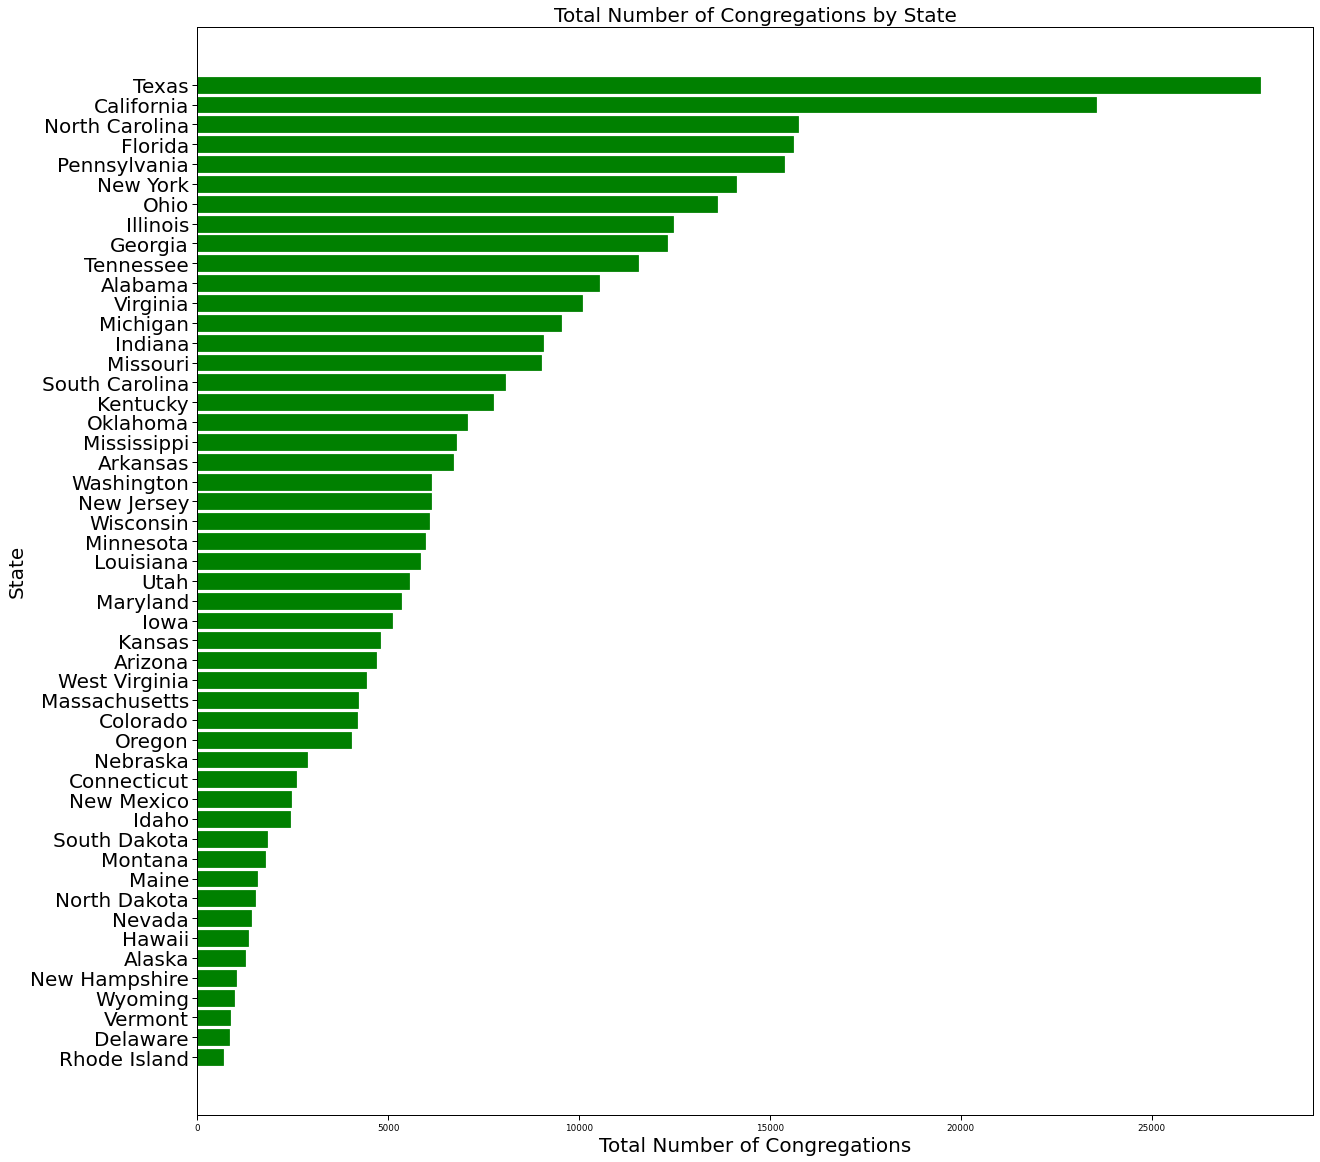

In [171]:
import matplotlib.pyplot as plt

frequencies = df2['Total Number of Congregations']
x_labels = df2['State']

plt.figure(figsize=(20, 20))

plt.barh(range(len(frequencies)), frequencies, color="green", 
     edgecolor='green', tick_label=x_labels)
plt.yticks(fontsize=20)
plt.ylabel('State', fontsize=20)
plt.xlabel('Total Number of Congregations', fontsize=20)
plt.title('Total Number of Congregations by State', fontsize=20)
plt.show()

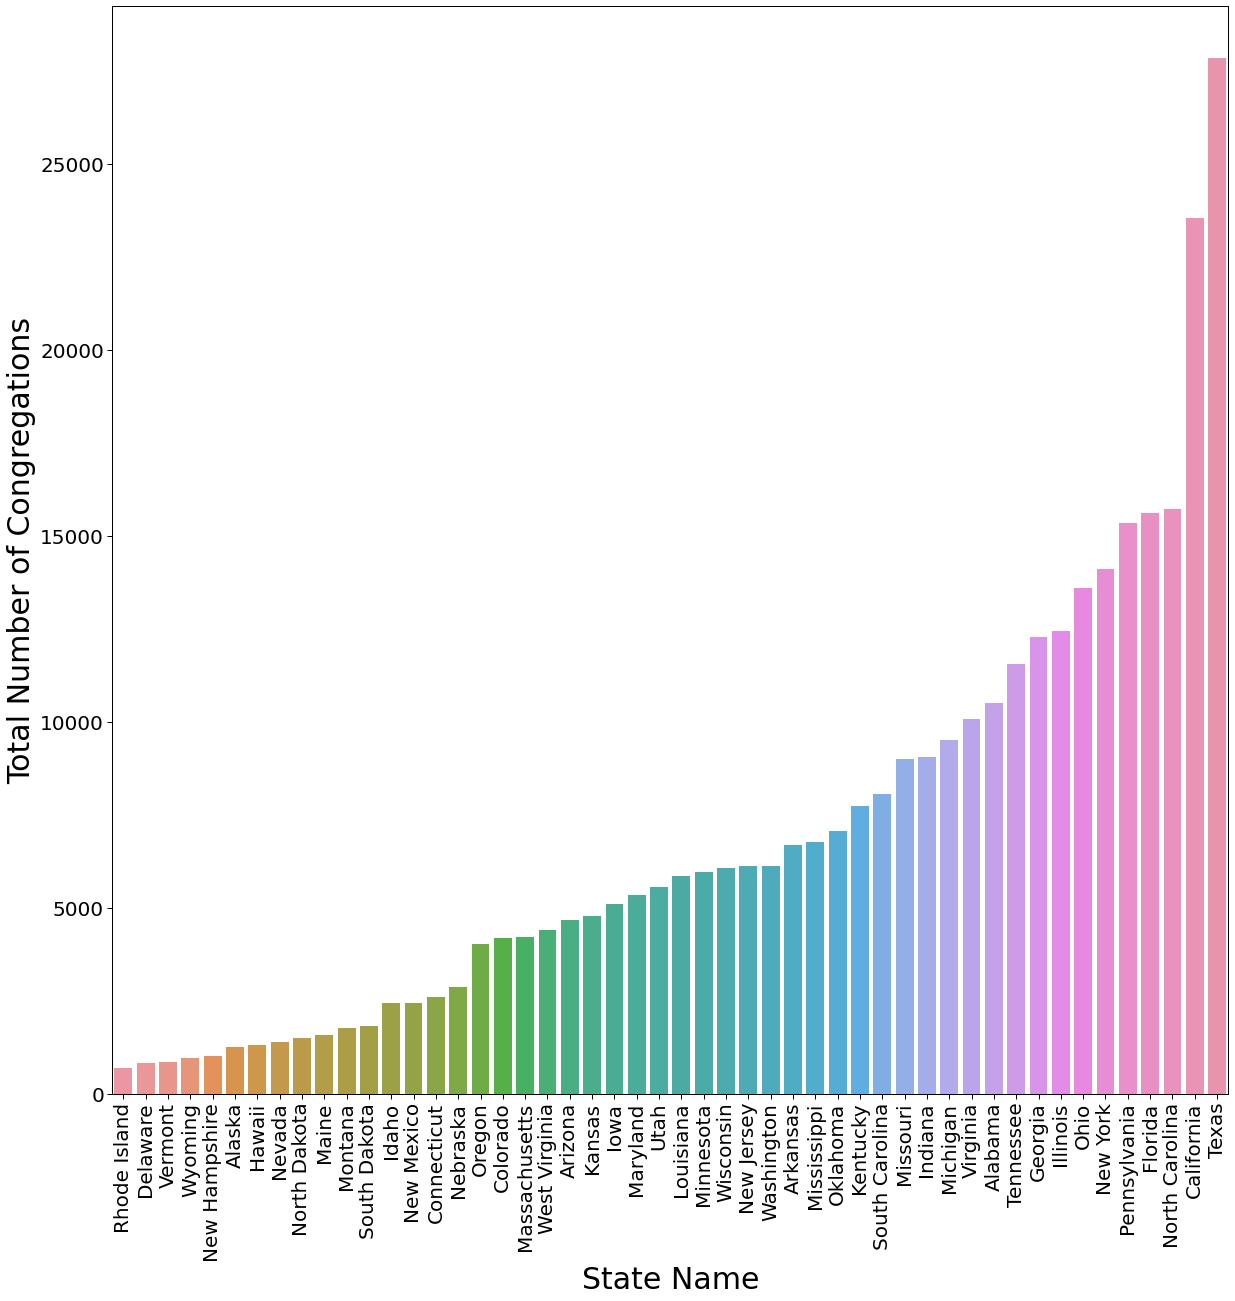

In [173]:
import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "Total Number of Congregations", data = df2)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State Name", fontsize=30)
b.set_ylabel("Total Number of Congregations", fontsize=30)

plt.show()

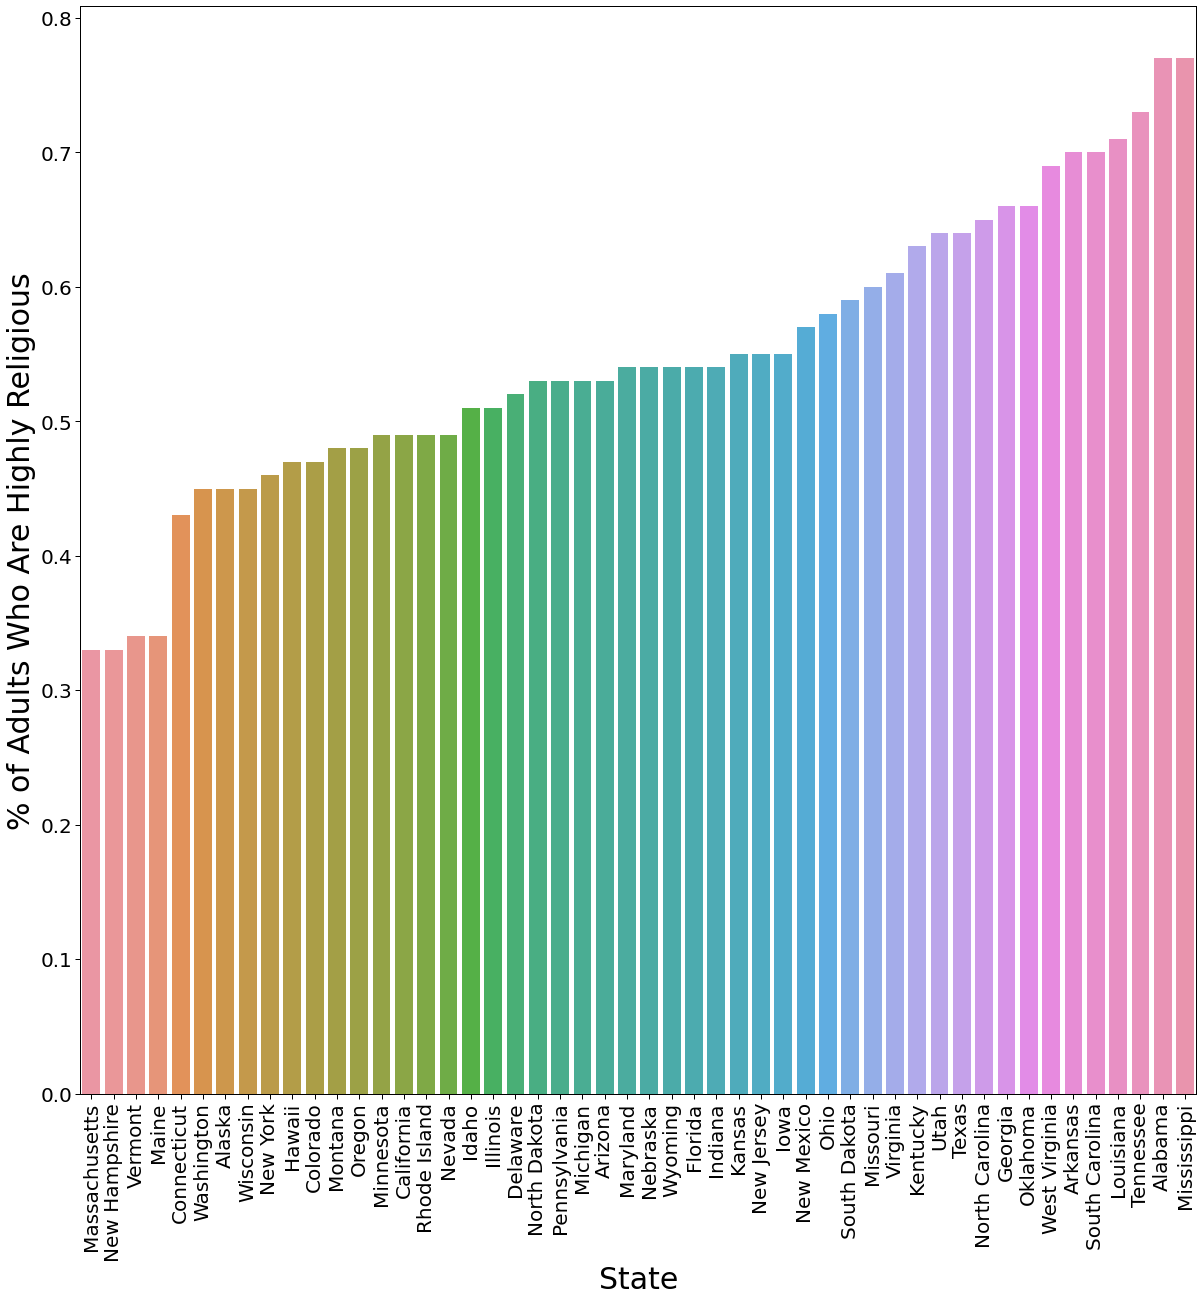

In [174]:
df3 = df2.sort_values('% of Adults Who Are Highly Religious')

import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "% of Adults Who Are Highly Religious", data = df3)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State", fontsize=30)
b.set_ylabel("% of Adults Who Are Highly Religious", fontsize=30)

plt.show()

In [178]:
# Congregations per person

all_df['Congregations Per 1000 People'] = (all_df['Total Number of Congregations']/ all_df['Estimated Population']) * 1000
all_df

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",Unnamed: 4,% of Adults Who Are Highly Religious,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,"Colleges, Universities, and Professional Schools",Computer Training,Cosmetology and Barber Schools,Educational Support Servies/Closed,Fine Arts Schools,Flight Training,Junior Colleges,Other Technical and Trade Schools,Congregations Per Capita,Congregations Per 1000 People
0,Alabama,10514,3007553,629.23,0.62923,0.77,4.779736e+06,86.2,25.5,0.0,41.0,0.0,10.0,0.0,0.0,0.0,38.0,3.0,0.002200,2.199703
1,Alaska,1246,240833,339.09,0.33909,0.45,7.102333e+05,92.8,29.6,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.001754,1.754353
2,Arizona,4673,2379928,372.33,0.37233,0.53,6.391986e+06,87.1,29.5,0.0,41.0,1.0,35.0,0.0,3.0,0.0,46.0,13.0,0.000731,0.731072
3,Arkansas,6697,1614357,553.64,0.55364,0.70,2.915897e+06,86.6,23.0,0.0,26.0,1.0,27.0,0.0,0.0,0.0,26.0,7.0,0.002297,2.296721
4,California,23558,16765751,450.04,0.45004,0.49,3.725391e+07,83.3,33.9,6.0,255.0,6.0,124.0,0.0,3.0,0.0,219.0,139.0,0.000632,0.632363
5,Colorado,4188,1902282,378.25,0.37825,0.47,5.029166e+06,91.7,40.9,0.0,57.0,1.0,28.0,0.0,2.0,0.0,38.0,11.0,0.000833,0.832742
6,Connecticut,2597,1830862,512.26,0.51226,0.43,3.574087e+06,90.6,39.3,3.0,29.0,0.0,13.0,0.0,0.0,1.0,20.0,33.0,0.000727,0.726619
7,Delaware,831,374917,417.53,0.41753,0.52,8.979403e+05,90.0,32.0,2.0,8.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0,0.000925,0.925451
8,Florida,15611,7357588,391.33,0.39133,0.54,1.880149e+07,88.2,29.9,2.0,131.0,3.0,76.0,0.0,1.0,4.0,112.0,71.0,0.000830,0.830306
9,Georgia,12292,4924376,508.31,0.50831,0.66,9.687742e+06,87.1,31.3,0.0,78.0,1.0,27.0,0.0,2.0,1.0,69.0,15.0,0.001269,1.268820


In [ ]:
import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "Congregations Per Capita", data = df2)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State", fontsize=30)
b.set_ylabel("Congregations Per Capita", fontsize=30)

plt.show()